BEST TUNING PARAMETER: 0.0003359818286283781


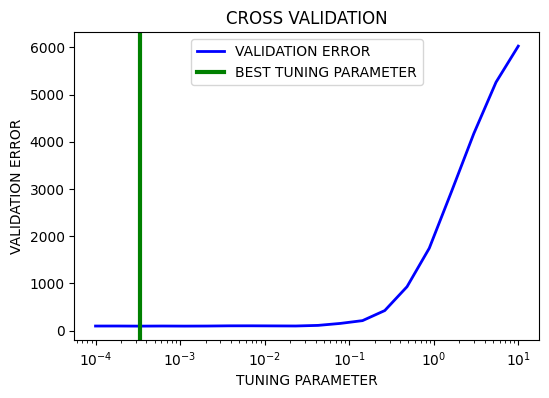

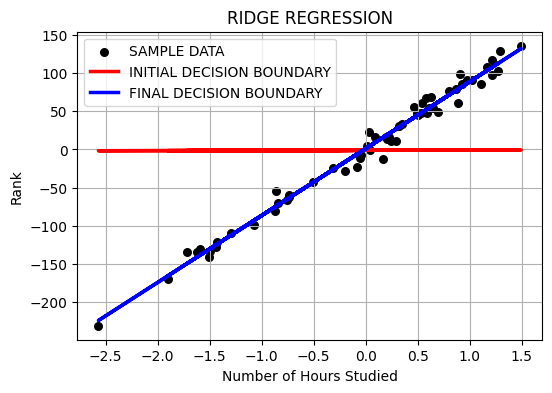

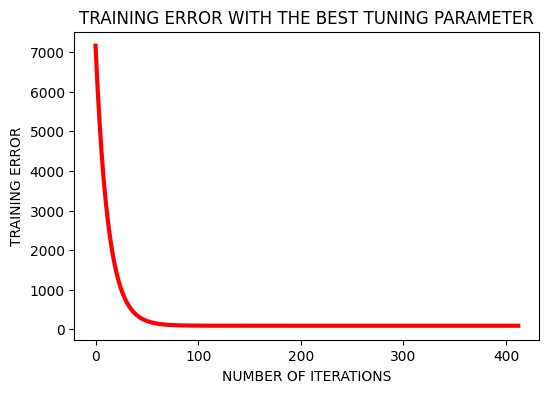

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression


X, y=make_regression(n_samples=60,n_features=1,noise=10)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_bias=np.c_[np.ones((X_scaled.shape[0],1)),X_scaled]

def GD(X,y,tuningparameter=0.1,learningrate=0.02,iterations=1000,tolerance=1e-8):
   n=len(X)
   weights=np.random.randn(X.shape[1])*1.4
   errors=[]


   for iteration in range(iterations):
       predictions=X@weights
       gradient=-2/n*X.transpose()@(y-predictions)+2*tuningparameter*weights
       weights=weights-learningrate*gradient


       MSE=np.mean((y-predictions)**2)
       errors.append(MSE)


       if iteration > 0 and abs(errors[-1]-errors[-2])<=tolerance:
           break


   return weights, errors

def cross_validation(X, y, tuningparameter_values, k=5):
   kf = KFold(n_splits=k,shuffle=True)
   validation_errors={tuningparameter:[]for tuningparameter in tuningparameter_values}


   for tuningparameter in tuningparameter_values:
       for train_index, val_index in kf.split(X):
           X_train, X_val=X[train_index],X[val_index]
           y_train, y_val=y[train_index],y[val_index]


           weights,_=GD(X_train, y_train, tuningparameter=tuningparameter)
           predictions_val=X_val@weights


           val_error=np.mean((y_val-predictions_val)**2)
           validation_errors[tuningparameter].append(val_error)


   avg_validation_errors={tuningparameter:np.mean(errors) for tuningparameter,errors in validation_errors.items()}
   best_tuningparameter=min(avg_validation_errors,key=avg_validation_errors.get)


   return best_tuningparameter,avg_validation_errors



tuningparameter_values=np.logspace(-4, 1, 20)
best_tuningparameter,avg_validation_errors=cross_validation(X_bias,y,tuningparameter_values)


print(f"BEST TUNING PARAMETER: {best_tuningparameter}")


plt.figure(figsize=(6,4))
plt.semilogx(tuningparameter_values,list(avg_validation_errors.values()),label='VALIDATION ERROR',color='blue',linewidth=2)
plt.axvline(x=best_tuningparameter,color='green',linewidth=3,label='BEST TUNING PARAMETER')
plt.title('CROSS VALIDATION')
plt.xlabel('TUNING PARAMETER')
plt.ylabel('VALIDATION ERROR')
plt.legend()
plt.show()


weights_best_tuningparameter,training_errors_best_tuningparameter = GD(X_bias,y,tuningparameter=best_tuningparameter)
predictions_best_tuningparameter=X_bias@weights_best_tuningparameter


initial_weights=np.random.randn(X_bias.shape[1])
initial_predictions=X_bias@initial_weights

plt.figure(figsize=(6,4))
plt.scatter(X,y,color='black',label="SAMPLE DATA",s=30)
plt.title("RIDGE REGRESSION")
plt.plot(X,initial_predictions,label="INITIAL DECISION BOUNDARY",color='red',linewidth=2.5)
plt.plot(X,predictions_best_tuningparameter,label="FINAL DECISION BOUNDARY",color='blue',linewidth=2.5)
plt.xlabel("Number of Hours Studied")
plt.ylabel("Rank")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(training_errors_best_tuningparameter,color='red',linewidth=3)
plt.title("TRAINING ERROR WITH THE BEST TUNING PARAMETER")
plt.ylabel("TRAINING ERROR")
plt.xlabel("NUMBER OF ITERATIONS")
plt.show()


